[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/alikn/intro_to_ai/blob/master/logistic_regression.ipynb)

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

 The columns are different measurements of material in a glass sample that can be used to identify the glass type. For detailed information on the columns in this data set: http://archive.ics.uci.edu/ml/datasets/glass+identification

Data Dictionary

- Id: number: 1 to 214
- RI: refractive index
- Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
- Mg: Magnesium
- Al: Aluminum
- Si: Silicon
- K : Potassium
- Ca: Calcium
- Ba: Barium
- Fe: Iron
- Type : Type of glass: types 1, 2, and 3 are Window glass and types 5, 6, and 7 are household glass

In [2]:
df = pd.read_csv('https://alik-courses.web.app/intro-to-ai/datasets/glass.csv')

In [6]:
df.shape

(214, 10)

### Split the data to train and validation sets

In [7]:
df_train_source, df_val_source = train_test_split(df, test_size=0.3, random_state=1234)

In [8]:
df_train = df_train_source.copy()
df_val = df_val_source.copy()

### Exploratory data analysis

In [9]:
df_train.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
27,1.51721,12.87,3.48,1.33,73.04,0.56,8.43,0.0,0.0,1
77,1.51627,13.00,3.58,1.54,72.83,0.61,8.04,0.0,0.0,2
134,1.51811,13.33,3.85,1.25,72.78,0.52,8.12,0.0,0.0,2
49,1.51898,13.58,3.35,1.23,72.08,0.59,8.91,0.0,0.0,1
176,1.51905,14.00,2.39,1.56,72.37,0.00,9.57,0.0,0.0,6


In [10]:
df_train.shape

(149, 10)

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 27 to 47
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      149 non-null    float64
 1   Na      149 non-null    float64
 2   Mg      149 non-null    float64
 3   Al      149 non-null    float64
 4   Si      149 non-null    float64
 5   K       149 non-null    float64
 6   Ca      149 non-null    float64
 7   Ba      149 non-null    float64
 8   Fe      149 non-null    float64
 9   Type    149 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 12.8 KB


In [12]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
RI,149.0,1.518183,0.002867,1.51131,1.51645,1.51768,1.51905,1.53393
Na,149.0,13.427248,0.711272,11.03000,12.89000,13.34000,13.87000,15.15000
Mg,149.0,2.778591,1.373970,0.00000,2.39000,3.48000,3.59000,4.49000
Al,149.0,1.468792,0.493294,0.29000,1.22000,1.41000,1.64000,3.50000
Si,149.0,72.656913,0.714062,69.89000,72.32000,72.76000,73.11000,74.55000
K,149.0,0.489597,0.570056,0.00000,0.14000,0.55000,0.61000,6.21000
Ca,149.0,8.812013,1.301841,5.43000,8.21000,8.57000,9.04000,16.19000
Ba,149.0,0.180470,0.484976,0.00000,0.00000,0.00000,0.00000,2.88000
Fe,149.0,0.057785,0.100733,0.00000,0.00000,0.00000,0.10000,0.51000
Type,149.0,2.798658,2.146587,1.00000,1.00000,2.00000,3.00000,7.00000


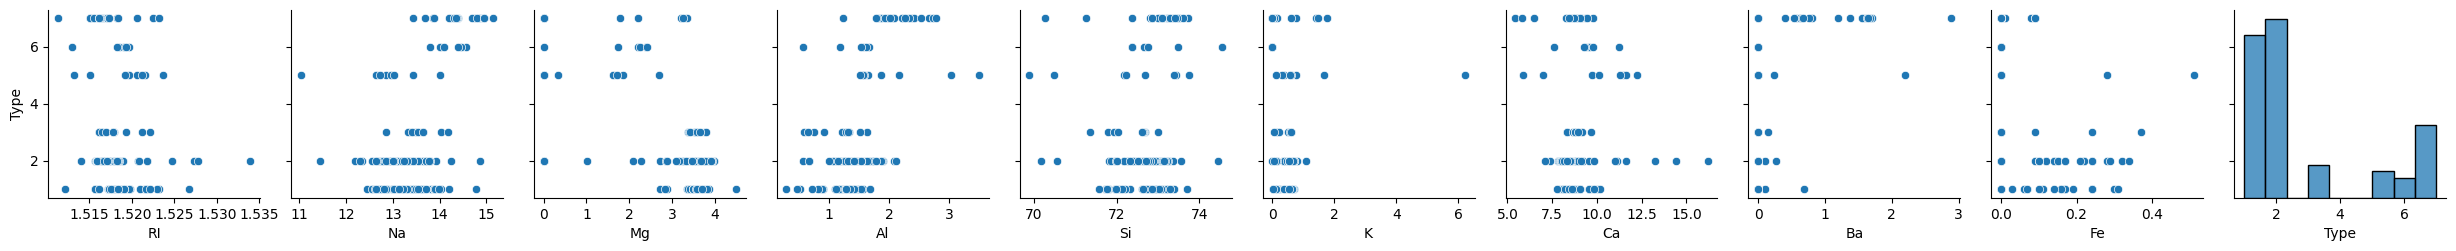

In [13]:
sns.pairplot(df_train, y_vars=['Type'])

### Preprocessing

To create a column which shows if a glass is of household type or window type, we map the "Type" column to a new column.
- Window glass: 0
- Household glass: 1

In [14]:
df_train['glass_category'] = df_train.Type.map({1: 0, 2: 0, 3: 0, 5: 1, 6: 1, 7: 1})

In [15]:
df_val['glass_category'] = df_val.Type.map({1: 0, 2: 0, 3: 0, 5: 1, 6: 1, 7: 1})

In [16]:
df_train.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,glass_category
27,1.51721,12.87,3.48,1.33,73.04,0.56,8.43,0.0,0.0,1,0
77,1.51627,13.00,3.58,1.54,72.83,0.61,8.04,0.0,0.0,2,0
134,1.51811,13.33,3.85,1.25,72.78,0.52,8.12,0.0,0.0,2,0
49,1.51898,13.58,3.35,1.23,72.08,0.59,8.91,0.0,0.0,1,0
176,1.51905,14.00,2.39,1.56,72.37,0.00,9.57,0.0,0.0,6,1


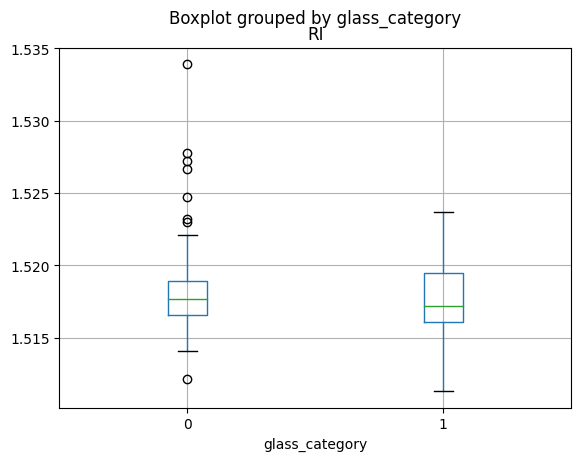

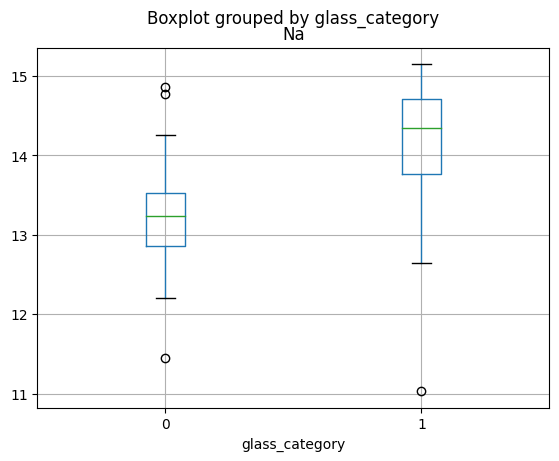

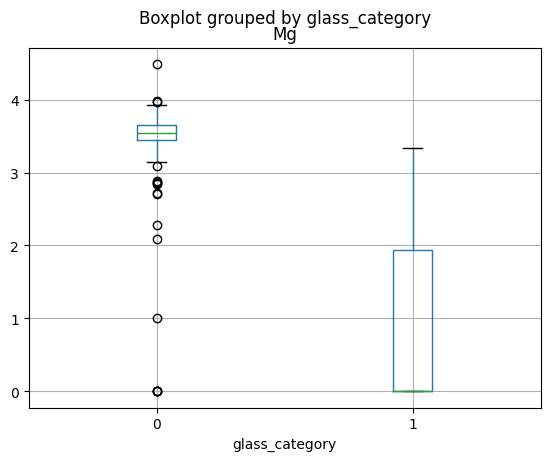

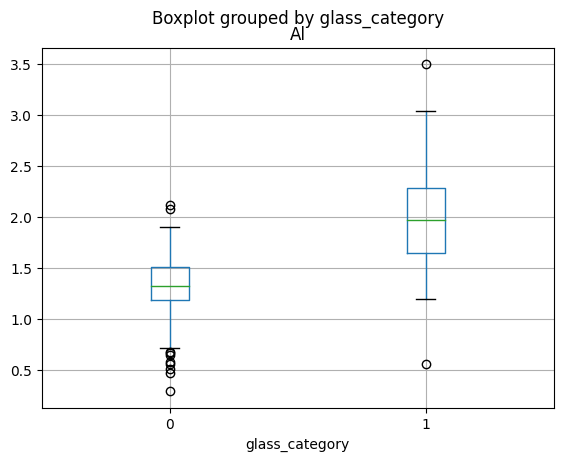

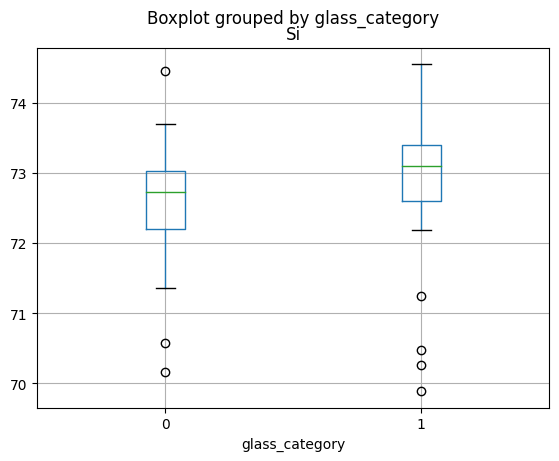

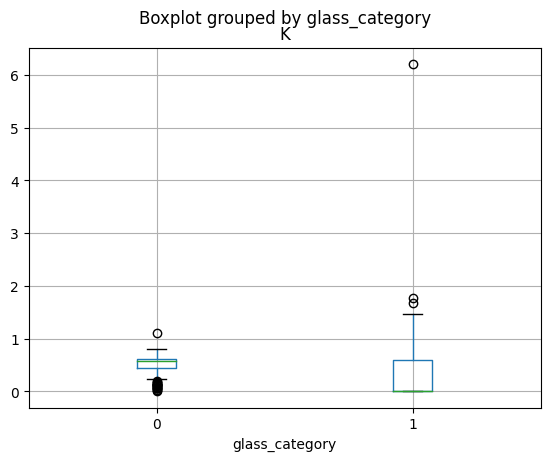

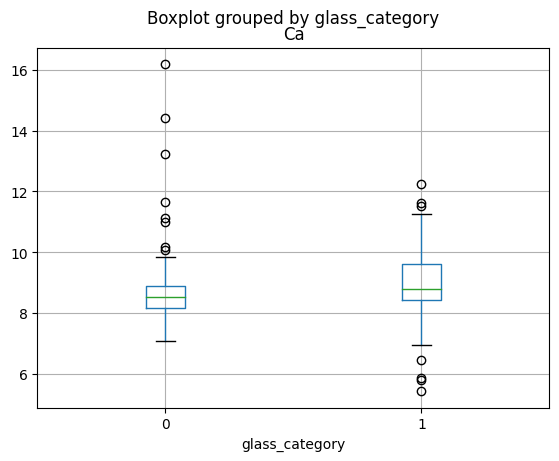

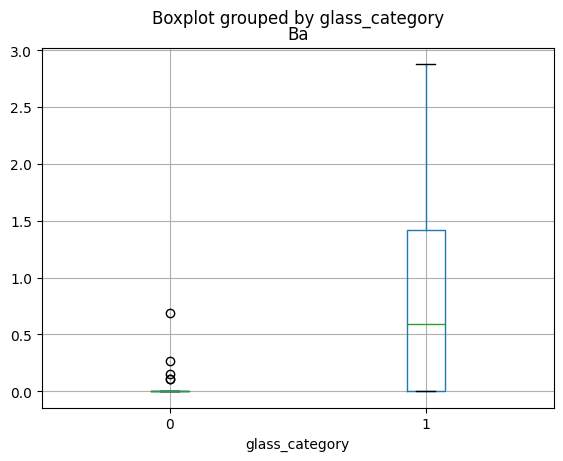

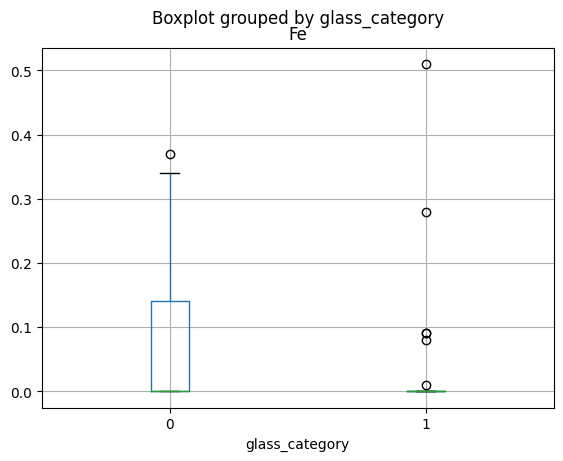

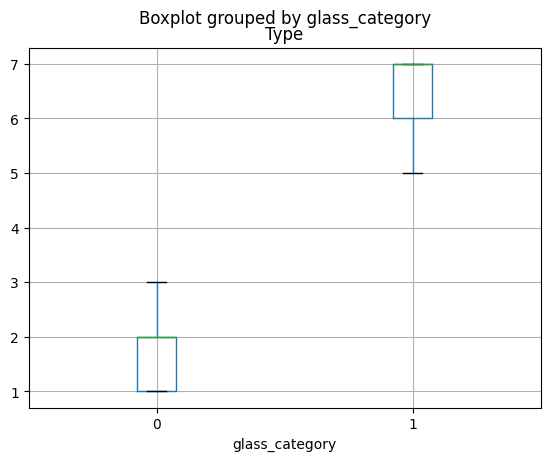

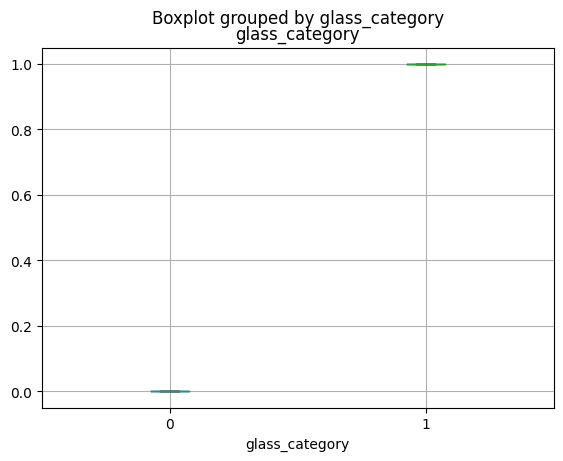

In [17]:
for col in df_train.columns:
    df_train.boxplot(column=col, by='glass_category')

### Training a logistic regression model

Base model:

In [18]:
X = df_train[['Mg']]
y = df_train['glass_category']

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

In [19]:
log_reg.coef_

array([[-1.43643256]])

In [20]:
log_reg.intercept_

array([2.34865477])

In [21]:
log_reg.predict_proba([[0], [3.2]])

C:\Users\ali_k\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.08717276, 0.91282724],
       [0.90447178, 0.09552822]])

In [22]:
log_reg.predict([[0], [3.2]])

C:\Users\ali_k\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1, 0], dtype=int64)

In [23]:
# Use val set for prediction
y_hat = log_reg.predict(df_val[['Mg']])

In [24]:
accuracy_score(df_val['glass_category'], y_hat)

0.8769230769230769

In [25]:
precision_score(df_val['glass_category'], y_hat)

0.6842105263157895

In [26]:
recall_score(df_val['glass_category'], y_hat)

0.8666666666666667

In [27]:
f1_score(df_val['glass_category'], y_hat)

0.7647058823529413

### Creating a training function

In [37]:
def train_log_reg(cols, C=1, max_iter=100, penalty='l2'):
  log_reg_model = LogisticRegression(C=C, max_iter=max_iter, penalty=penalty, solver='saga')
  log_reg_model.fit(df_train[cols], df_train['glass_category'])
  
  y_hat = log_reg_model.predict(df_val[cols])

  print(f"features: {cols}")
  print(f"intercept: {log_reg_model.intercept_}")
  print(f"coefficients: {log_reg_model.coef_}")
  print(f"Accuracy score: {accuracy_score(df_val['glass_category'], y_hat)}")
  print(f"Precision score: {precision_score(df_val['glass_category'], y_hat)}")
  print(f"Recall score: {recall_score(df_val['glass_category'], y_hat)}")
  print(f"f1 score: {f1_score(df_val['glass_category'], y_hat)}")

In [38]:
train_log_reg(['Mg'])

features: ['Mg']
intercept: [2.34642977]
coefficients: [[-1.43569787]]
Accuracy score: 0.8769230769230769
Precision score: 0.6842105263157895
Recall score: 0.8666666666666667
f1 score: 0.7647058823529413


In [39]:
train_log_reg(['Mg', 'Al'])

features: ['Mg', 'Al']
intercept: [-1.22906196]
coefficients: [[-1.33097946  2.14040951]]
Accuracy score: 0.8615384615384616
Precision score: 0.6666666666666666
Recall score: 0.8
f1 score: 0.7272727272727272


In [36]:
df_train.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type',
       'glass_category'],
      dtype='object')

In [40]:
train_log_reg(['Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'])

features: ['Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
intercept: [-0.00170708]
coefficients: [[ 0.36235315 -0.97054896  0.34365479 -0.04218421  0.00940078 -0.13121241
   0.3118945  -0.02240609]]
Accuracy score: 0.9384615384615385
Precision score: 0.8235294117647058
Recall score: 0.9333333333333333
f1 score: 0.8749999999999999


C:\Users\ali_k\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [51]:
train_log_reg(['Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'], max_iter=10000)

features: ['Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
intercept: [-0.0029105]
coefficients: [[ 0.72364565 -1.79831691  1.17902862 -0.05351034 -0.12914077 -0.48416124
   0.7399746  -0.14071032]]
Accuracy score: 0.9230769230769231
Precision score: 0.7777777777777778
Recall score: 0.9333333333333333
f1 score: 0.8484848484848485


In [52]:
train_log_reg(['Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'], C=0.1, max_iter=10000)

features: ['Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
intercept: [-0.00368872]
coefficients: [[ 0.42585591 -1.06485926  0.44998672 -0.04460064  0.01000668 -0.19914123
   0.35854364 -0.03403335]]
Accuracy score: 0.9384615384615385
Precision score: 0.8235294117647058
Recall score: 0.9333333333333333
f1 score: 0.8749999999999999


In [53]:
train_log_reg(['Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'], penalty='l1', max_iter=10000)

features: ['Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
intercept: [-0.00909035]
coefficients: [[ 0.65417325 -1.94339041  1.20563853 -0.02793956  0.         -0.55499476
   0.55636179  0.        ]]
Accuracy score: 0.9230769230769231
Precision score: 0.7777777777777778
Recall score: 0.9333333333333333
f1 score: 0.8484848484848485


In [55]:
train_log_reg(['Na', 'Mg', 'Al', 'Si', 'Ca', 'Ba'])

features: ['Na', 'Mg', 'Al', 'Si', 'Ca', 'Ba']
intercept: [-0.00162459]
coefficients: [[ 0.36334223 -0.96884346  0.34534879 -0.0428053  -0.12807409  0.312576  ]]
Accuracy score: 0.9384615384615385
Precision score: 0.8235294117647058
Recall score: 0.9333333333333333
f1 score: 0.8749999999999999


C:\Users\ali_k\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
